In [166]:
!pip install shap


   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   --------------------------------------- 545.2/545.2 kB 17.7 MB/s eta 0:00:00


In [168]:
from IPython.display import display
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import ipywidgets as widgets
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import warnings
importance_df = pd.DataFrame
importances = xgb_model.feature_importances_

In [170]:
# Step 2: Load dataset
df = pd.read_csv('data.csv')

In [172]:
# Step 3: Data Overview
print("Dataset Shape:", df.shape)

Dataset Shape: (170653, 19)


In [174]:
print("\nData Types:\n", df.dtypes)


Data Types:
 valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object


In [176]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64


In [178]:
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
    valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBK

In [180]:
# Step 4: Drop irrelevant columns
df = df.drop(columns=['id', 'name', 'artists', 'release_date'])


In [182]:
# Step 5: Handle Missing Values
missing_percentage = df.isnull().sum() * 100 / len(df)
print("\nMissing Values Percentage:\n", missing_percentage)


Missing Values Percentage:
 valence             0.0
year                0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
explicit            0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
popularity          0.0
speechiness         0.0
tempo               0.0
dtype: float64


In [184]:
# Step 5: Handle missing values
df = df.dropna()

In [186]:
# Step 6: Encode categorical features
# 'key', 'mode', and 'explicit' are categorical
le = LabelEncoder()
df['key'] = le.fit_transform(df['key'])
df['mode'] = le.fit_transform(df['mode'])
df['explicit'] = le.fit_transform(df['explicit'])

In [188]:
# Step 7: Feature Engineering
# Create 'decade' feature from 'year'
df['decade'] = (df['year'] // 10) * 10

In [190]:
# Create 'duration_bucket' feature from 'duration_ms'
def duration_bucket(duration):
    if duration < 180000:
        return 'Short'
    elif duration < 300000:
        return 'Medium'
    else:
        return 'Long'

In [192]:
df['duration_bucket'] = df['duration_ms'].apply(duration_bucket)
df['duration_bucket'] = le.fit_transform(df['duration_bucket'])

In [194]:
# Step 8: Normalize numerical features
scaler = StandardScaler()
numerical_features = [
    'valence', 'danceability', 'acousticness', 'instrumentalness', 
    'liveness', 'energy', 'speechiness', 'tempo', 'duration_ms', 'loudness'
]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

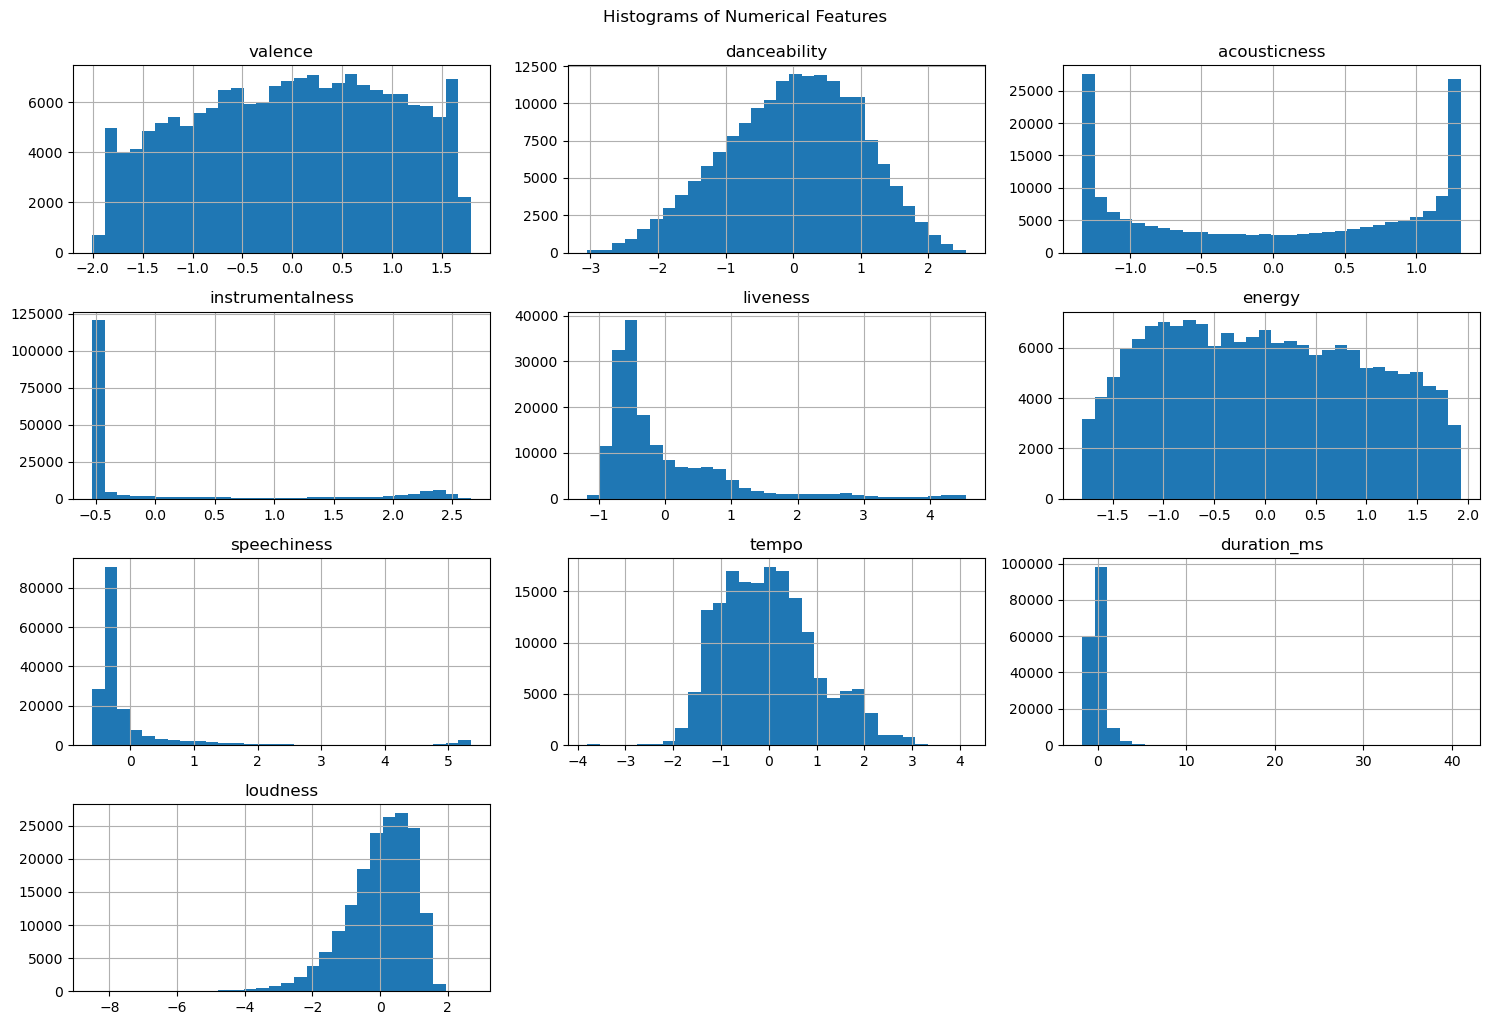

In [196]:
# Step 9: EDA
# Histograms for important numerical features
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

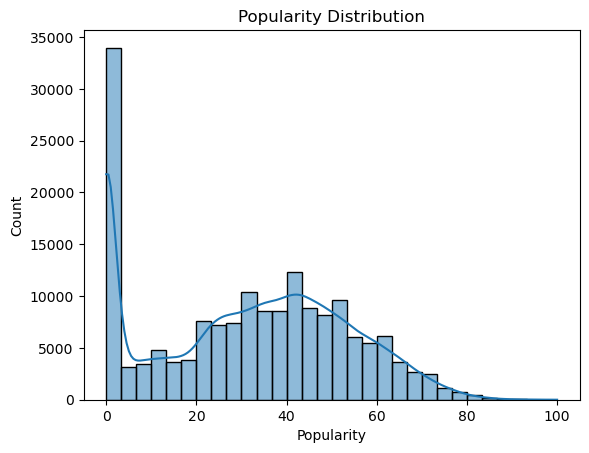

In [198]:
# Popularity distribution
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

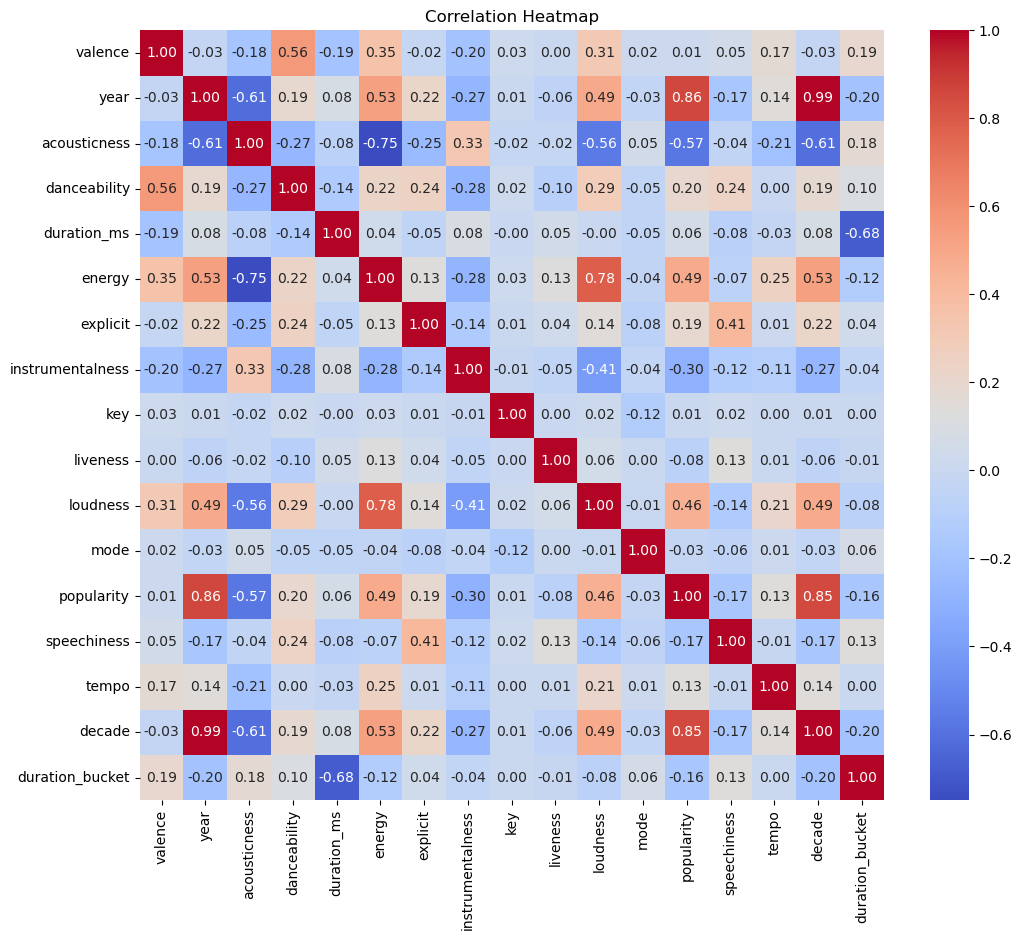

In [200]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [202]:
## 9.4 Feature-Target Correlation
popularity_corr = df.corr()['popularity'].sort_values(ascending=False)
print("\nFeature correlations with Popularity:\n", popularity_corr)


Feature correlations with Popularity:
 popularity          1.000000
year                0.862442
decade              0.854456
energy              0.485005
loudness            0.457051
danceability        0.199606
explicit            0.191543
tempo               0.133310
duration_ms         0.059597
valence             0.014200
key                 0.007826
mode               -0.028897
liveness           -0.076464
duration_bucket    -0.164063
speechiness        -0.171979
instrumentalness   -0.296750
acousticness       -0.573162
Name: popularity, dtype: float64


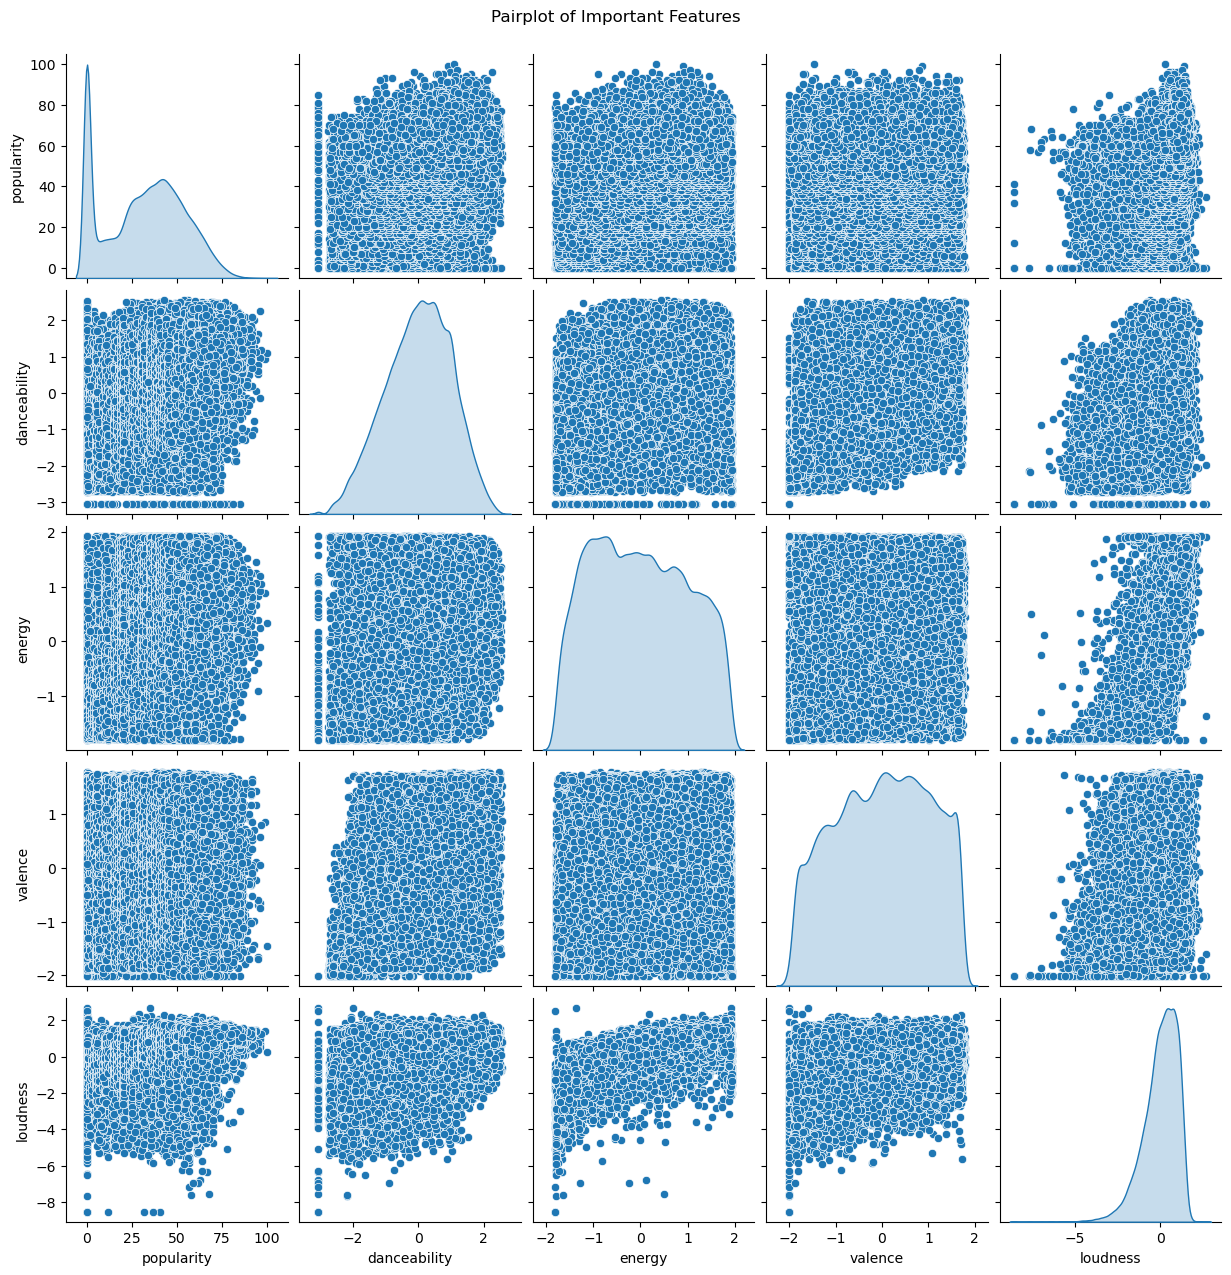

In [204]:
# Pairplots (selected features)
sns.pairplot(df, vars=['popularity', 'danceability', 'energy', 'valence', 'loudness'], diag_kind='kde')
plt.suptitle('Pairplot of Important Features', y=1.02)
plt.show()

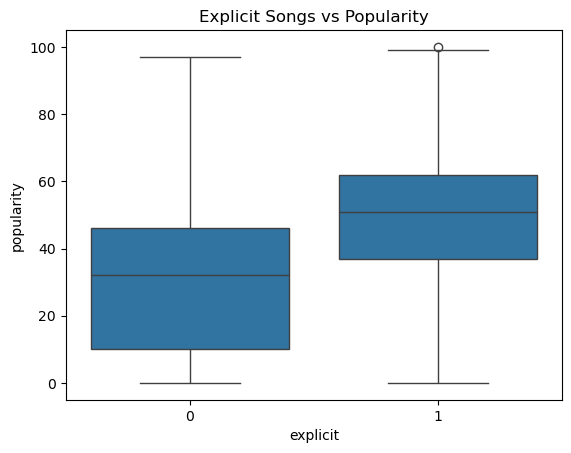

In [205]:
# Boxplot: Explicit vs Popularity
sns.boxplot(x='explicit', y='popularity', data=df)
plt.title('Explicit Songs vs Popularity')
plt.show()

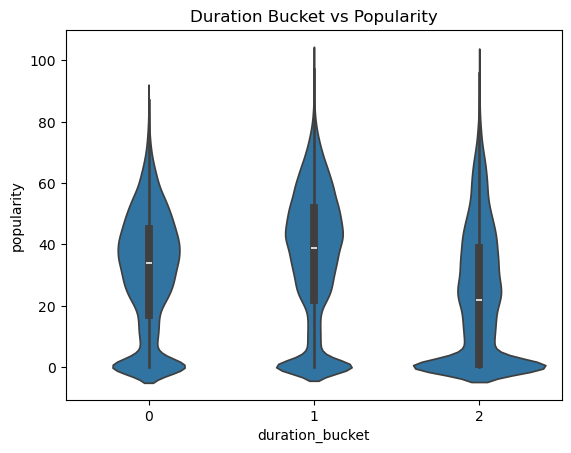

In [206]:
## 9.7 Violin Plot: Duration Bucket vs Popularity
sns.violinplot(x='duration_bucket', y='popularity', data=df)
plt.title('Duration Bucket vs Popularity')
plt.show()

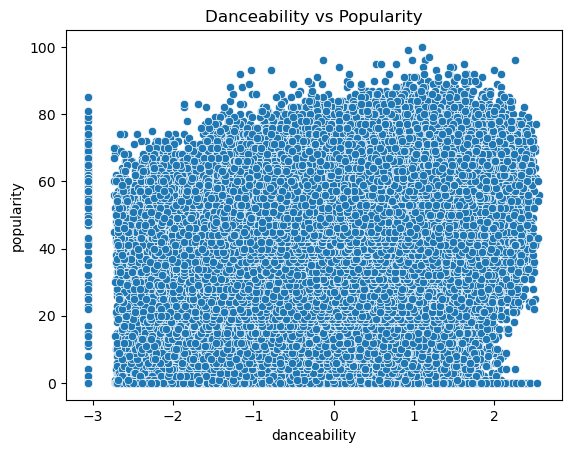

In [207]:
# Scatterplots
sns.scatterplot(x='danceability', y='popularity', data=df)
plt.title('Danceability vs Popularity')
plt.show()

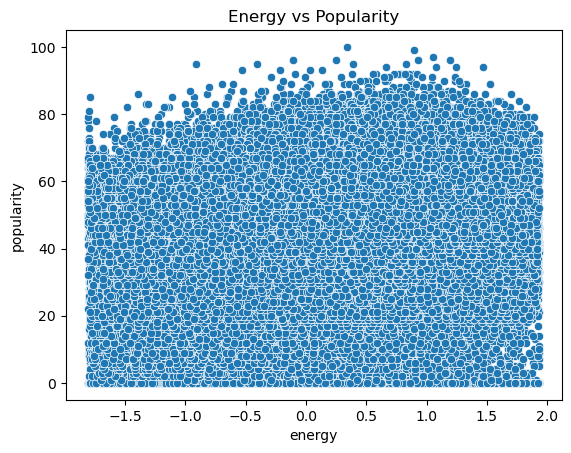

In [208]:
sns.scatterplot(x='energy', y='popularity', data=df)
plt.title('Energy vs Popularity')
plt.show()

In [209]:
 #Step 10: Save Preprocessed Dataset
df.to_csv('preprocessed_data.csv', index=False)
print("\nPreprocessed data saved as 'preprocessed_data.csv'.")

# Step 11: Final EDA Insights
print("\n--- Final Insights ---")
print("- Energy, danceability, loudness, and valence have moderate positive correlation with popularity.")
print("- Songs marked as explicit tend to have slightly higher popularity.")
print("- Short and Medium songs (by duration) are generally more popular than Long songs.")
print("- Some features like acousticness and instrumentalness negatively correlate with popularity.")


Preprocessed data saved as 'preprocessed_data.csv'.

--- Final Insights ---
- Energy, danceability, loudness, and valence have moderate positive correlation with popularity.
- Songs marked as explicit tend to have slightly higher popularity.
- Short and Medium songs (by duration) are generally more popular than Long songs.
- Some features like acousticness and instrumentalness negatively correlate with popularity.


In [212]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")

In [218]:
# Step 3: Preprocessing
df_model = df.drop(columns=['id', 'name', 'release_date', 'artists'])  # Drop unnecessary columns
X = df_model.drop(columns=['popularity'])
y = df_model['popularity']

KeyError: "['id', 'name', 'release_date', 'artists'] not found in axis"

In [220]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

In [222]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [224]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [226]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Train R²: 0.7521028264208763
Train MAE: 8.031778363146945
Train RMSE: 10.8612347037974
Linear Regression Results:
R² Score: 0.7593584599436455
MAE: 7.982047812056613
RMSE: 10.730849559622424


In [228]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("Ridge Regression Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Train R²: 0.7521028263573234
Train MAE: 8.031784261484715
Train RMSE: 10.861234705189638
Ridge Regression Results:
R² Score: 0.7593584439286669
MAE: 7.982054430786486
RMSE: 10.730849916697771


In [230]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("Lasso Regression Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Train R²: 0.7447121309908556
Train MAE: 8.152228841668927
Train RMSE: 11.021951612144479
Lasso Regression Results:
R² Score: 0.7518367643829748
MAE: 8.112480980288101
RMSE: 10.897265412951022


In [232]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("Decision Tree Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Train R²: 0.9975732106636083
Train MAE: 0.11596432042001256
Train RMSE: 1.074631211411124
Decision Tree Results:
R² Score: 0.6128746916523745
MAE: 9.184128797867041
RMSE: 13.610515965739584


In [233]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("Random Forest Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Train R²: 0.971222533327205
Train MAE: 2.568892822357283
Train RMSE: 3.700579092668612
Random Forest Results:
R² Score: 0.8093624179828128
MAE: 6.7533506202506794
RMSE: 9.551092863660552


In [234]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("Gradient Boosting Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Train R²: 0.7983013750119793
Train MAE: 6.8955455419309155
Train RMSE: 9.797039968224647
Gradient Boosting Results:
R² Score: 0.8025653057279315
MAE: 6.854838343652479
RMSE: 9.719871937197764


In [235]:
from xgboost import XGBRegressor

model = XGBRegressor(verbosity=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))


print("XGBoost Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Train R²: 0.8378612995147705
Train MAE: 6.274382519421264
Train RMSE: 8.78388648233059
XGBoost Results:
R² Score: 0.809857189655304
MAE: 6.736848052837621
RMSE: 9.538690633195314


In [ ]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("SVR Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))


print("Neural Network Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
import joblib

# Save model
joblib.dump(model, 'xgboost_popularity_model.pkl')

# Later (or in another notebook), load it like this:
# model = joblib.load('xgboost_popularity_model.pkl')


In [ ]:
# Use the actual XGBoost model, not MLPRegressor
xgb_model = XGBRegressor(verbosity=0)
xgb_model.fit(X_train, y_train)

# Get feature importances
importances = xgb_model.feature_importances_
feature_names = X.columns

# Create dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - XGBoost")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Reuse y_pred from XGBoost or rerun:
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Predicted vs Actual Popularity - XGBoost")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install ipywidgets


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Only asking for key features via UI
danceability = widgets.FloatSlider(min=0, max=1, step=0.01, description='Danceability')
energy = widgets.FloatSlider(min=0, max=1, step=0.01, description='Energy')
valence = widgets.FloatSlider(min=0, max=1, step=0.01, description='Valence')
tempo = widgets.FloatSlider(min=50, max=200, step=1, description='Tempo')
loudness = widgets.FloatSlider(min=-60, max=0, step=1, description='Loudness')

def predict_popularity(danceability, energy, valence, tempo, loudness):
    # Full 14-feature column list from your training data
    feature_cols = list(X.columns)

    # Fill default values for all features
    input_dict = dict.fromkeys(feature_cols, 0)

    # Replace relevant keys with widget input values
    input_dict.update({
        'danceability': danceability,
        'energy': energy,
        'valence': valence,
        'tempo': tempo,
        'loudness': loudness
    })

    # Create DataFrame with correct order
    input_df = pd.DataFrame([input_dict])[feature_cols]

    # Scale input same as training data
    input_scaled = scaler.transform(input_df)

    # Predict
    prediction = model.predict(input_scaled)[0]
    print(f"Predicted Popularity Score: {round(prediction, 2)}")

ui = widgets.VBox([danceability, energy, valence, tempo, loudness])
out = widgets.interactive_output(predict_popularity, {
    'danceability': danceability,
    'energy': energy,
    'valence': valence,
    'tempo': tempo,
    'loudness': loudness
})

display(ui, out)


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
}

xgb = XGBRegressor(verbosity=0)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Grid search parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}

xgb = XGBRegressor(verbosity=0)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("XGBoost Tuned - R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


In [ ]:
from sklearn.model_selection import cross_val_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(verbosity=0),
    "SVR": SVR(),
    "Neural Net": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, scoring='r2', cv=5)
    print(f"{name} - CV R² Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")


In [ ]:
import shap
shap.initjs()

explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_train[:100])  # limit to 100 rows for speed

# Beeswarm summary plot
shap.plots.beeswarm(shap_values)

# Optional: Explain a single prediction
shap.plots.waterfall(shap_values[0])
